In [111]:
from sklearn.datasets import fetch_california_housing

In [112]:
data=fetch_california_housing()

In [113]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [114]:
import pandas as pd 
import numpy as np 
dataset=np.abs(pd.DataFrame(data.data,columns=data.feature_names))

dataset.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,122.24


In [149]:
x=dataset.iloc[:1000,:4]
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms
0,8.3252,41.0,6.984127,1.023810
1,8.3014,21.0,6.238137,0.971880
2,7.2574,52.0,8.288136,1.073446
3,5.6431,52.0,5.817352,1.073059
4,3.8462,52.0,6.281853,1.081081


In [150]:
y=pd.DataFrame(data.target,columns=data.target_names)
y=y.head(1000)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size
                                               =0.2,random_state=45)

In [152]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800, 1), (200, 1))

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [154]:
dtr=DecisionTreeRegressor(criterion= 'squared_error', max_depth= 1, splitter= 'best')

In [155]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [156]:
import matplotlib.pyplot as plt 
%matplotlib inline 

[Text(0.5, 0.75, 'x[0] <= 4.715\nsquared_error = 0.802\nsamples = 800\nvalue = 2.091'),
 Text(0.25, 0.25, 'squared_error = 0.4\nsamples = 578\nvalue = 1.731'),
 Text(0.75, 0.25, 'squared_error = 0.632\nsamples = 222\nvalue = 3.029')]

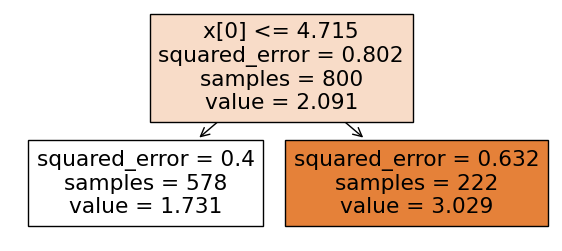

In [157]:
from sklearn import tree
plt.figure(figsize=(7,3))
tree.plot_tree(dtr,filled=True)

In [158]:
y_pred=dtr.predict(x_test)
y_pred

array([1.73111422, 1.73111422, 1.73111422, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 1.73111422, 3.02932473, 1.73111422,
       1.73111422, 3.02932473, 1.73111422, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 3.02932473, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 1.73111422,
       3.02932473, 1.73111422, 3.02932473, 3.02932473, 1.73111422,
       3.02932473, 1.73111422, 3.02932473, 3.02932473, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 3.02932473, 1.73111422,
       1.73111422, 1.73111422, 3.02932473, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 1.73111422,
       3.02932473, 1.73111422, 1.73111422, 1.73111422, 3.02932

In [159]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4105538520904386

<h3>hyperParmameter tuning</h3>

In [160]:
parameter={
    "splitter" : ["best", "random"],
    "criterion" : ["squared_error", "friedman_mse", "absolute_error"],
    "max_depth":[1,2,3,4,5]
}

In [161]:
model=DecisionTreeRegressor()

In [162]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(model,param_grid=parameter,cv=3,scoring="accuracy")
gs

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [163]:
gs.fit(x_train,y_train)

C:\Users\wwrao\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\wwrao\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\wwrao\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\wwrao\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\wwrao\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [164]:
gs.best_params_

{'criterion': 'squared_error', 'max_depth': 1, 'splitter': 'best'}

In [165]:
y_pred1=gs.predict(x_test)
y_pred1

array([1.73111422, 1.73111422, 1.73111422, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 1.73111422, 3.02932473, 1.73111422,
       1.73111422, 3.02932473, 1.73111422, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 3.02932473,
       1.73111422, 1.73111422, 3.02932473, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 1.73111422,
       3.02932473, 1.73111422, 3.02932473, 3.02932473, 1.73111422,
       3.02932473, 1.73111422, 3.02932473, 3.02932473, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 3.02932473, 1.73111422,
       1.73111422, 1.73111422, 3.02932473, 1.73111422, 1.73111422,
       1.73111422, 1.73111422, 1.73111422, 1.73111422, 1.73111422,
       3.02932473, 1.73111422, 1.73111422, 1.73111422, 3.02932